In [127]:

import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [128]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [129]:
class logisticRegression():
    def __init__(self,lr=0.001,n_iters=1000):
        self.lr=lr
        self.n_iter=n_iters
        self.weight=None
        self.bias=None

    def fit(self,X,y):
        n_samples,n_features=X.shape
        print (n_samples)
        self.weight=np.zeros(n_features)
        self.bias=0
        
        for i in range(self.n_iter):
            linear_pred=np.dot(X,self.weight)+self.bias
            predictions=sigmoid(linear_pred)

            
            dw = (1.0/n_samples) * np.dot(X.T, (predictions - y))

            db = (1.0/n_samples) * np.sum((predictions-y))

            self.weight=self.weight-self.lr*dw
            self.bias=self.bias-self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weight) + self.bias
        y_pred = sigmoid(linear_pred)
        return [0 if y < 0.5 else 1 for y in y_pred]



In [130]:
from sklearn import datasets
bc=datasets.load_breast_cancer()

In [131]:
X,y=bc.data,bc.target

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=None)

My Model

In [133]:
Lr=logisticRegression()
Lr.fit(X_train,y_train)
y_pred=Lr.predict(X_test)


455


In [134]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)


In [135]:
acc=accuracy(y_pred,y_test)

In [136]:
print(acc)

0.8947368421052632


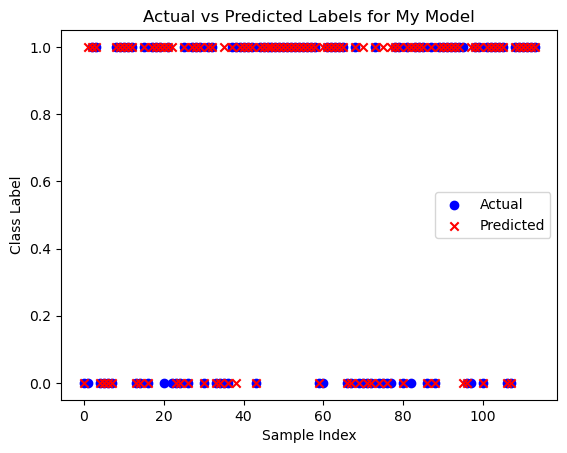

In [137]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs Predicted Labels for My Model')
plt.legend()
plt.show()

SKlearn Model

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [139]:
sklearn_lr = LogisticRegression()
sklearn_lr.fit(X_train, y_train)
y_pred_sklearn = sklearn_lr.predict(X_test)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(acc_sklearn)

0.9385964912280702


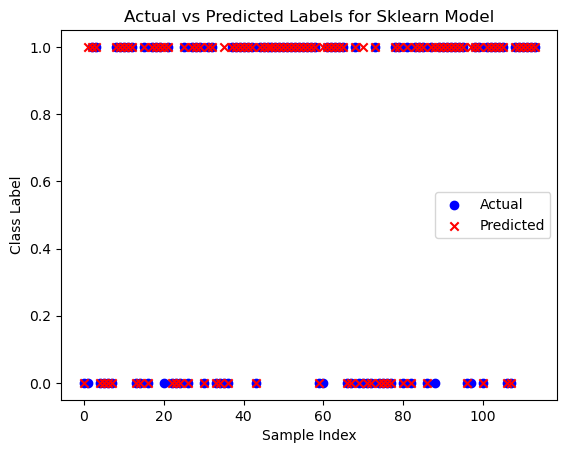

In [140]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(y_pred_sklearn)), y_pred_sklearn, label='Predicted', color='red', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs Predicted Labels for Sklearn Model')
plt.legend()
plt.show()